In [1]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

%cd "/content/drive/My Drive/CitNet"
%ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/CitNet
 confusion_matrix.ipynb   data_summary.ipynb   output/
 data/                   'Deep GCN.ipynb'      PCA.ipynb
'Data Summary.gdoc'       method/              train_test_split.ipynb


In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
TYPE = "raw"

In [0]:
def plot(cnf_matrixs, output_path, methods, tick_labels):

    fig, axes = plt.subplots(2, 3, figsize=(18, 15))
    fig.delaxes(axes[1][2])

    cbar_ax = fig.add_axes([.93, .3, .015, .4])
    for i, ax in enumerate(axes.flat):
        # print(i, ax)
        if i == 5:
            fig.savefig(output_path, format='png', transparent=False, dpi=400, bbox_inches='tight')
            return

        if i == 2:
            offset = 0.2
            pos = ax.get_position()
            pos.y0 -= offset
            pos.y1 -= offset
            ax.set_position(pos)
            # fig.subplots_adjust(top=0.1 + pos.y0)
        
        cnf_matrix = cnf_matrixs[i]
        method = methods[i]

        sns.heatmap(cnf_matrix, annot=True, square=True,
                    xticklabels=tick_labels, yticklabels=tick_labels,
                    linewidths=0.5, linecolor='red',
                    fmt=".1f", vmin=0, vmax=1, ax=ax,
                    cbar=(i == 0), cbar_ax=None if i else cbar_ax)
        
        ax.set_title("{}".format(method), fontsize=18)
        ax.set_xlabel("Prediction", fontsize=16)
        ax.set_ylabel("Ground Truth", fontsize=16)

    

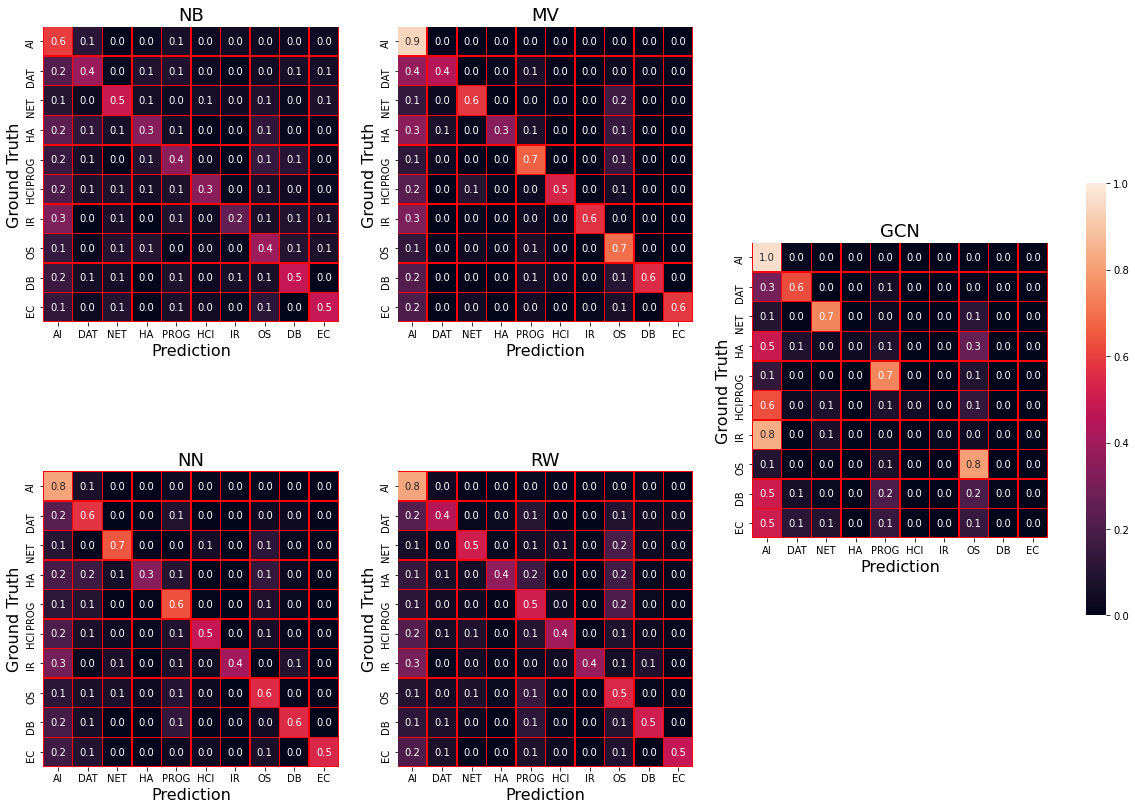

In [88]:
METHODS = ["NB", "MV", "GCN", "NN", "RW"]

output_path = "output/{}/heatmap_{}.png".format(TYPE, TYPE)
cnf_matrixs = []

for method in METHODS:
    if TYPE == "small":
        data_path = "output/small/{}.csv".format(method)
        tick_labels = ["GA", "REL", "THE", "RUL", "CB", "PM", "NN"]
    else:
        data_path = "output/raw/{}.csv".format(method)
        tick_labels = ["AI", "DAT", "NET", "HA", "PROG", "HCI", "IR", "OS", "DB", "EC"]
    
    df = pd.read_csv(data_path)
    cnf_matrixs.append(confusion_matrix(df["gt"], df["pred"], normalize="true"))

plot(cnf_matrixs, output_path, METHODS, tick_labels)